# **YOUTUBE CONTENT ANALYSIS**

 In this project, I used the YouTube Data API to collect data from some of my favorite YouTubers' channels to analyze their engagement and content performance. By extracting metrics like views, likes, comments, and subscriber growth across various videos, I aimed to uncover patterns and trends that drive audience engagement. This analysis provides insights into the types of content that resonate most with viewers and highlights the factors contributing to channel growth and sustained audience interest on YouTube. Through this approach, I hope to better understand the key elements that lead to successful content creation and audience retention on the platform.


## 1. IMPORTING NECCESARY LIBRARIES

In [1]:
from googleapiclient.discovery import build
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#2.  **DEFINING API_KEY AND CHANNEL_ID**

In [119]:
API_KEY = "YOUR_API_KEY"
CHANNEL_IDS = ['UC_Yqe8akzUwSNHmqSYdeLfg', #cheymuv
               'UCKnUxxnZMs0Ig0ge3Ust_EQ', #Natalie Tewa
               'UCzSYlvjgeMZhD1lalg7KjwA', #Dr Linda Muthoni
               'UC6fVFxrbf0HDRW3B2mdWFGA',  #TMI
               'UCQ-4T4gGSO5R6s_p344r8jA',  #Kim Kardicey
               'UCcFJAPewDIjE_BpTP0ulMkw',  #Chelsea Wambui
               ' UChsYvr3JjZczrFeFiVWD8cQ',  #Zariln Zonroe
               'UCGyNrdig4WBXi-PfxWmVLDg',   #Snimhlongo
]

youtube = build("youtube", "v3", developerKey = API_KEY)

# 3. **FUNCTION TO EXTRACT DATA**

In [5]:
def get_channel_stats(youtube, CHANNEL_IDS):
  all_data = []
  request = youtube.channels().list(
      part="snippet, contentDetails, statistics",
      id = ','.join( CHANNEL_IDS))

  response = request.execute()

  for i in range(len(response["items"])):
    data = dict(
    channel_name = response["items"][i]["snippet"]["title"],
    date_created=response["items"][i]["snippet"]["publishedAt"],
    subscribers=response["items"][i]["statistics"]["subscriberCount"],
    Total_videos = response["items"][i]["statistics"]["videoCount"],
    Total_views = response["items"][i]["statistics"]["viewCount"],
        )

    all_data.append(data)

  return all_data

# 4. **DICTIONARY CONTAINING CONTENT DATA**

In [18]:
channel_statistics = get_channel_stats(youtube, CHANNEL_IDS)
channel_statistics

[{'channel_name': 'Dr. Lindah Muthoni',
  'date_created': '2014-12-07T18:47:26Z',
  'subscribers': '45100',
  'Total_videos': '58',
  'Total_views': '3795633'},
 {'channel_name': 'Chelsea Wambui',
  'date_created': '2022-04-10T10:59:56.424125Z',
  'subscribers': '41700',
  'Total_videos': '51',
  'Total_views': '1884827'},
 {'channel_name': 'SNIMHLONGO',
  'date_created': '2008-08-20T18:51:11Z',
  'subscribers': '155000',
  'Total_videos': '223',
  'Total_views': '10957192'},
 {'channel_name': 'Kim Kardicey',
  'date_created': '2016-02-28T11:11:28Z',
  'subscribers': '24900',
  'Total_videos': '166',
  'Total_views': '3768648'},
 {'channel_name': 'Natalie Tewa',
  'date_created': '2015-02-11T02:41:21Z',
  'subscribers': '113000',
  'Total_videos': '84',
  'Total_views': '7210774'},
 {'channel_name': 'cheymuv',
  'date_created': '2014-04-26T18:30:43Z',
  'subscribers': '129000',
  'Total_videos': '76',
  'Total_views': '8257294'},
 {'channel_name': 'zarilyn zonroe',
  'date_created': '2

# **Converting to a DataFrame**

In [66]:
channel_df = pd.DataFrame(channel_statistics)

# 5. **EXPLORATORY DATA ANALYSIS**

In [21]:
channel_df

,channel_name,date_created,subscribers,Total_videos,Total_views
0,Dr. Lindah Muthoni,2014-12-07T18:47:26Z,45100,58,3795633
1,Chelsea Wambui,2022-04-10T10:59:56.424125Z,41700,51,1884827
2,SNIMHLONGO,2008-08-20T18:51:11Z,155000,223,10957192
3,Kim Kardicey,2016-02-28T11:11:28Z,24900,166,3768648
4,Natalie Tewa,2015-02-11T02:41:21Z,113000,84,7210774
5,cheymuv,2014-04-26T18:30:43Z,129000,76,8257294
6,zarilyn zonroe,2016-12-26T17:29:42Z,26900,258,3363514
7,TMI Podcast KE,2021-06-29T05:05:30.649655Z,134000,365,13583021


In [22]:
channel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   channel_name  8 non-null      object
 1   date_created  8 non-null      object
 2   subscribers   8 non-null      object
 3   Total_videos  8 non-null      object
 4   Total_views   8 non-null      object
dtypes: object(5)
memory usage: 448.0+ bytes


In [23]:
channel_df.dtypes

,0
channel_name,object
date_created,object
subscribers,object
Total_videos,object
Total_views,object


In [24]:
channel_df.describe()

,channel_name,date_created,subscribers,Total_videos,Total_views
count,8,8,8,8,8
unique,8,8,8,8,8
top,Dr. Lindah Muthoni,2014-12-07T18:47:26Z,45100,58,3795633
freq,1,1,1,1,1


# 5. 1 **Data Cleaning**

We need to convert date_created from object datatype to datetime.



In [70]:
channel_df['date_created'] = pd.to_datetime(channel_df['date_created'].dt.date, errors='coerce')

In [65]:
channel_df

,channel_name,date_created,subscribers,Total_videos,Total_views
0,Dr. Lindah Muthoni,2014-12-07,45100,58,3795633
1,Chelsea Wambui,2022-04-10,41700,51,1884827
2,SNIMHLONGO,2008-08-20,155000,223,10957192
3,Kim Kardicey,2016-02-28,24900,166,3768648
4,Natalie Tewa,2015-02-11,113000,84,7210774
5,cheymuv,2014-04-26,129000,76,8257294
6,zarilyn zonroe,2016-12-26,26900,258,3363514
7,TMI Podcast KE,2021-06-29,134000,365,13583021


In [69]:
channel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   channel_name  8 non-null      object             
 1   date_created  6 non-null      datetime64[ns, UTC]
 2   subscribers   8 non-null      object             
 3   Total_videos  8 non-null      object             
 4   Total_views   8 non-null      object             
dtypes: datetime64[ns, UTC](1), object(4)
memory usage: 448.0+ bytes


In [49]:
channel_df.columns

Index(['channel_name', 'date_created', 'subscribers', 'Total_videos',
       'Total_views'],
      dtype='object')

We also need to convert subscribers, total_videos and total_views columns from objects to integers

In [88]:
channel_df = channel_df.astype({'subscribers': 'int',
                                'Total_videos': 'int',
                                'Total_views': 'int'})


In [89]:
channel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   channel_name  8 non-null      object        
 1   date_created  6 non-null      datetime64[ns]
 2   subscribers   8 non-null      int64         
 3   Total_videos  8 non-null      int64         
 4   Total_views   8 non-null      int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 448.0+ bytes


In [76]:
#Exporting to csv
from google.colab import drive
drive.mount('/content/drive')

channel_df.to_csv('/content/drive/My Drive/youtube_channel.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 5.2 **DATA VISUALIZATION**

# **1. HEATMAP OF NUMERICAL COLUMNS**

In [90]:
# Select numerical columns
numerical_df = channel_df.select_dtypes(include=['number'])


In [91]:
# Calculate the correlation matrix
correlation = numerical_df.corr()
correlation

,subscribers,Total_videos,Total_views
subscribers,1.000000,0.263792,0.902815
Total_videos,0.263792,1.000000,0.603252
Total_views,0.902815,0.603252,1.000000


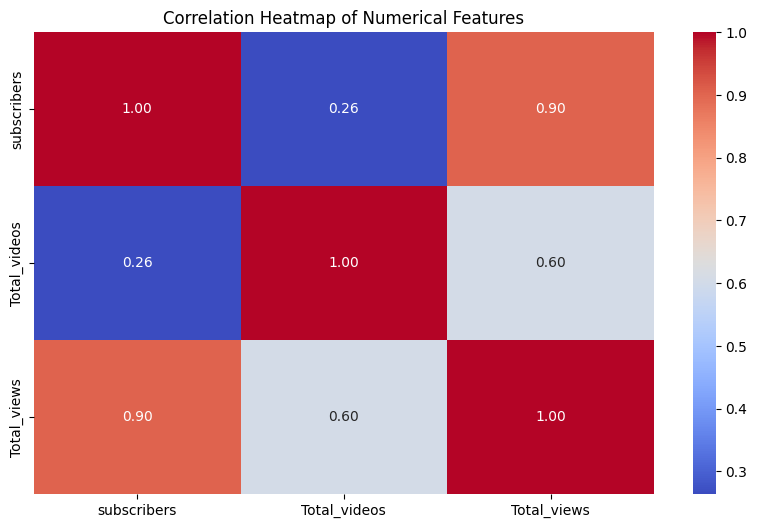

In [111]:
# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# INTERPRETATION

# Subscribers and Total Views:

There is a high positive correlation (0.90) between subscribers and total_views, suggesting that as the number of subscribers increases, the total views tend to increase as well. This is expected, as more subscribers typically mean more regular viewers. Subscribers are key to viewership.

# Total Videos and Total Views:

 The correlation between total_videos and total_views is moderately positive (0.60). This indicates that channels with more videos generally have more total views, although this relationship is not as strong as with subscribers. It may suggest that uploading more content helps increase viewership, but the impact varies depending on other factors, like video quality or audience engagement.

# Subscribers and Total Videos:

 There is a weak positive correlation (0.26) between subscribers and total_videos, which means that the number of videos doesn’t strongly influence subscriber count. This could suggest that, for this dataset, subscriber growth may depend more on video quality or relevance rather than sheer quantity.


# **2. NUMBER OF SUBSCRIBERS PER CHANNEL**

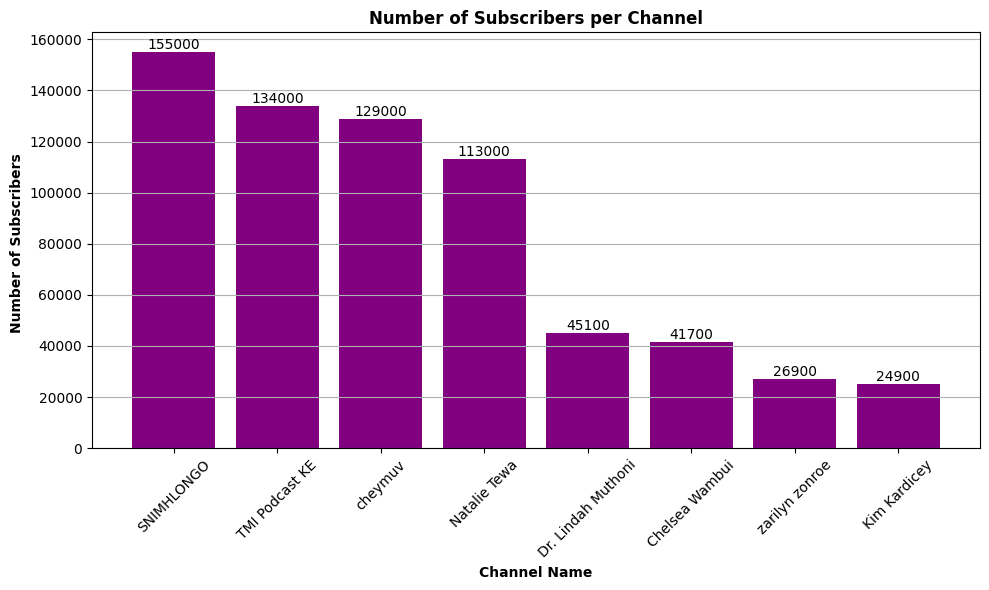

In [101]:
# Sort the DataFrame by subscribers in descending order
channel_df = channel_df.sort_values(by='subscribers', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(channel_df['channel_name'], channel_df['subscribers'], color= 'purple')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

# Add titles and labels
plt.title('Number of Subscribers per Channel', fontweight = "bold")
plt.xlabel('Channel Name', fontweight = "bold")
plt.ylabel('Number of Subscribers ', fontweight = "bold")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# INTERPRETATION

# Top Channels:

 Channels like SNIHLONGO and TMI podcast KE have the highest number of subscribers, with SNIHLONGO leading at 155,000 subscribers. These channels appear to be quite popular, possibly due to content that resonates well with a large audience.

# Mid-tier Channels:
 Channels like cheymuv and Natalie Tewa follow with substantial but lower subscriber counts compared to the top channels. These channels might have a dedicated audience, though smaller in number.

# Lower-tier Channels:
 Channels like Dr. Lindah Muthoni, Chelsea Wambui, Zariyn Zonroe, and Kim Kardicey have fewer subscribers, with Kim Kardicey having the lowest at 24,900 subscribers. These channels may be newer, or their content might be tailored to a more niche audience.

# **3. NUMBER OF VIEWS PER CHANNEL**

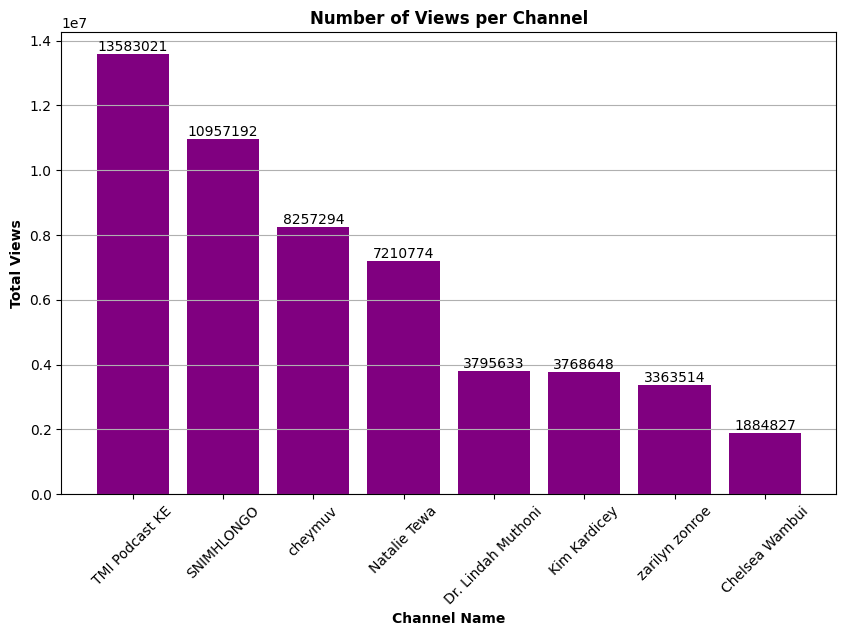

In [112]:
# Sort the DataFrame by total views in descending order
channel_df = channel_df.sort_values(by='Total_views', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(channel_df['channel_name'], channel_df['Total_views'], color='purple')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

# Add titles and labels
plt.title('Number of Views per Channel',fontweight= "bold")
plt.xlabel('Channel Name', fontweight= "bold")
plt.ylabel('Total Views', fontweight= "bold")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# INTERPRETATION

TMI Podcast KE leads in both total videos and views, indicating consistent content creation and high audience engagement.

SNIWMHLONGO and cheymuv have relatively high view counts despite having fewer videos than Zariyn Zonroe, suggesting these channels may have higher average views per video.

Chelsea Wambui ranks lowest in both videos and views, indicating a smaller or less engaged audience compared to the other channels.

# **4. NUMBER OF VIDEOS PER CHANNEL**

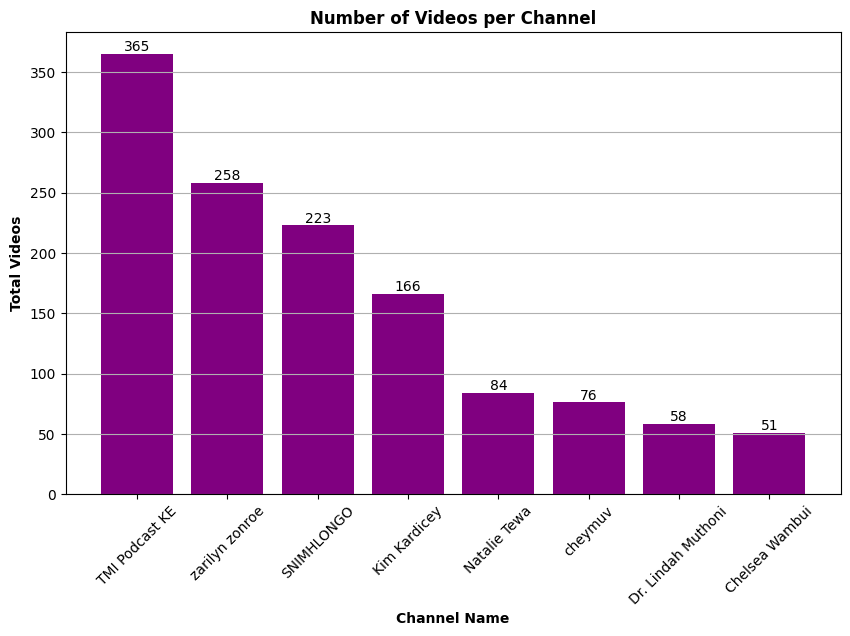

In [106]:
# Sort the DataFrame by total videos in descending order
channel_df = channel_df.sort_values(by='Total_videos', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(channel_df['channel_name'], channel_df['Total_videos'], color='purple')

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, yval, ha='center', va='bottom')

# Add titles and labels
plt.title('Number of Videos per Channel', fontweight = "bold")
plt.xlabel('Channel Name', fontweight = "bold")
plt.ylabel('Total Videos', fontweight = "bold")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# INTERPRETATION

TMI Podcast KE has the most videos, with 365 videos, followed by Zariyn Zonroe (258 videos) and SNIWMHLONGO (223 videos).

Chelsea Wambui has the fewest videos, with only 51.

# 6. **CONCLUSION**

To maximize growth and engagement, channels should focus on building a strong subscriber base while maintaining consistent content quality. While frequent uploads may help increase total views, gaining subscribers requires more than just quantity. Channels with established, engaged audiences tend to have higher viewership, emphasizing the value of cultivating loyal followers. This insight can guide future strategies for content creation and audience development on YouTube.

